In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)

In [9]:
def read_csv(input_fp):
    
    input_mat = pd.read_csv(input_fp, index_col = 0)
    
    #print(input_mat)
    
    return input_mat

#mcpf1_1027_lg1 = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_all_lgs/lg1_v2_cat.csv")
#mcpf1_1027_lg2 = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_all_lgs/lg2_v2_cat.csv")

#mcpf1_1027_lg1_random = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_random/lg1_cat_random_v2.csv")
#mcpf1_1027_lg2_random = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_random/lg2_cat_random_v2.csv")

panel_20201104 = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20201104_lg1_cat.csv")
#panel_20201104_random = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/filtered_dfs/20201105_lg1_random_cat.csv")
new_standard = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/mol_cell_review/outs/cv_metric/full_depth/null_outs/concat_files/20220404_standard_null")
#sub1_pairwise_corr = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/outs/20210303_pairwise_redo_cat.csv")

#static_time = read_csv("/oak/stanford/scg/lab_congle/PRT/10X_analysis/202011_temporal_mem/outs/gene_corrs.csv")
#static_df = read_csv("/oak/stanford/scg/lab_congle/PRT/10X_analysis/202011_temporal_mem/outs/cat_20201116.csv")
#rank_gene = read_csv("/home/nwhughes/mem_seq_home/files/20201108_rank_df.csv")
#print(static_time)

#nwh_11 = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/mol_cell_review/outs/cv_metric/full_depth/cat_results/nwh_11_lg102_cat.csv")
#nwh_12 = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/mol_cell_review/outs/cv_metric/full_depth/cat_results/nwh12_lg109_cat_results.csv")

#panel_20220321_random = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/mol_cell_review/outs/cv_metric/cat_files/2022Mar22_TGTAAGCAAT_random_cat.csv")
#sub2_pairwise_corr = read_csv("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/mol_cell_review/outs/corr_metric/nwh_12_lg109/cat_results.csv")


In [75]:
# with the pairwise corr mem metric approach -- how well do the spearman and pearson values correlate across clones / expriments


def compare_pair_cc(df_1, df_2):
    
    combo_df = pd.DataFrame(index = df_2.index)
    #print(df_1)
    df_1_drop = df_1.dropna()
    df_2_drop = df_2.dropna()
    
    for gene, row in df_1_drop.iterrows():
        
        pcc_1 = row["pearson_r"]
        scc_1 = row["spearman_r"]
        
        combo_df.loc[gene, "pcc_1"] = pcc_1
        combo_df.loc[gene, "scc_1"] = scc_1
        
    for gene, row in df_2_drop.iterrows():
        
        pcc_2 = row["pearson_r"]
        scc_2 = row["spearman_r"]
        
        combo_df.loc[gene, "pcc_2"] = pcc_2
        combo_df.loc[gene, "scc_2"] = scc_2
        
    #print(combo_df)
    
    return combo_df

comp_cc_1 = compare_pair_cc(sub1_pairwise_corr, sub2_pairwise_corr)
    

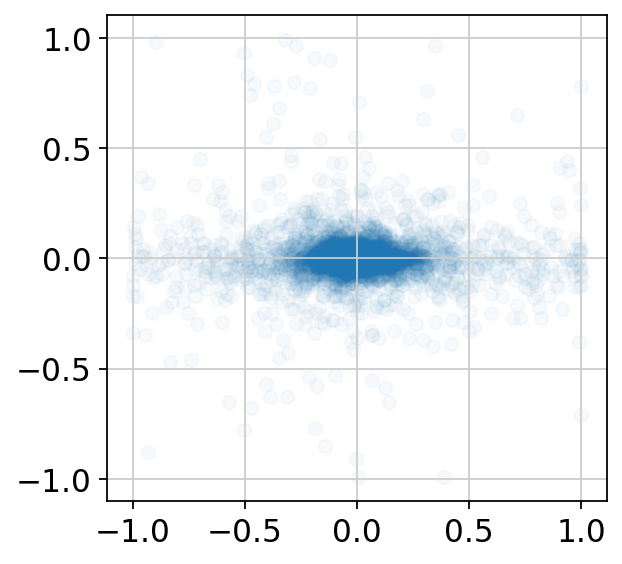

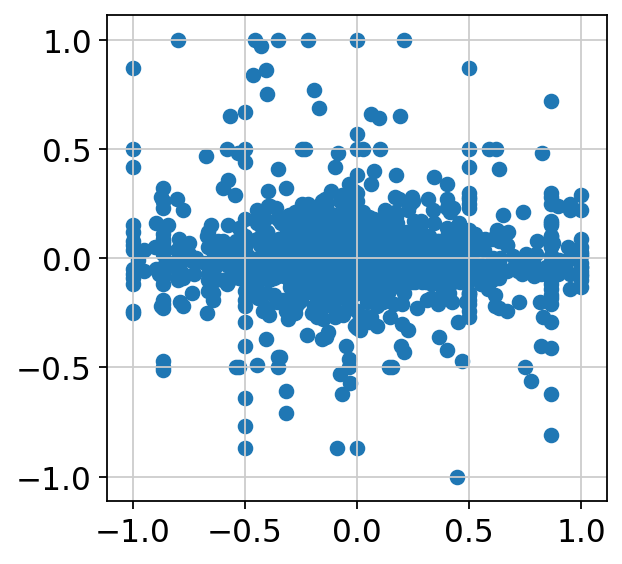

In [78]:
# plot cross-exp comparison

plt.scatter(comp_cc_1["pcc_1"], comp_cc_1["pcc_2"], alpha = 0.03)
plt.show()
plt.scatter(comp_cc_1["scc_1"], comp_cc_1["scc_2"])



In [10]:
# plot the CI of given variable in a bin vs. observed value

import seaborn as sns

#print(panel_20201104)
df_1 = pd.merge(panel_20201104, new_standard, left_index=True, right_index=True)

print(df_1)
#df_2 = pd.merge(mcpf1_1027_lg2, mcpf1_1027_lg2_random, left_index=True, right_index=True)

#test_df.to_csv("/labs/congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_random/20201030_random_vs_obs_lg1.csv")
#df_2.to_csv("/labs/congle/PRT/dzy_mem_seq/outs/20201026_mem_gene_var/smplbc_random/20201030_random_vs_obs_lg2.csv")

                             stdev       avg   max_avg  coeff_var   entropy  \
genes                                                                         
A1BG                      0.125302  0.237641  0.459016   0.527274  4.898651   
A1BG-AS1                  0.060164  0.039070  0.230854   1.539903  3.707108   
A4GALT                    0.075587  0.047954  0.406792   1.576240  3.865823   
AAAS                      0.137567  0.148158  0.580557   0.928517  4.514558   
AACS                      0.084971  0.082264  0.406667   1.032909  4.444837   
...                            ...       ...       ...        ...       ...   
ZXDC                      0.057931  0.048626  0.187739   1.191339  4.057946   
ZYG11B                    0.087527  0.112218  0.329710   0.779976  4.631982   
ZYX                       0.188802  0.293336  0.789899   0.643637  4.814436   
ZZEF1                     0.058890  0.045575  0.196408   1.292165  3.990421   
barcode_transcript_v1new  0.299249  0.849264  1.4298

In [5]:
from functools import reduce

#dfs = [panel_20201104, panel_20201104_random, pairwise_corr]

sub1_dfs = [nwh_11, panel_20201104_random]
sub2_dfs = [nwh_12, panel_20201104_random]
#sub2_dfs = [panel_20220321, panel_20201104_random]

sub1_df_final = reduce(lambda left,right: pd.merge(left,right,on='genes'), sub1_dfs)
sub2_df_final = reduce(lambda left,right: pd.merge(left,right,on='genes'), sub2_dfs)





In [6]:
print(sub2_df_final)

        stdev    avg  max_avg  coeff_var  entropy  inter_gini  min_intra_gini  \
genes                                                                           
1-Mar   0.002  0.000    0.012      4.584    1.679       0.958           0.000   
1-Mar   0.013  0.007    0.067      1.891    4.149       0.786           0.000   
2-Mar   0.033  0.034    0.192      0.962    5.338       0.493           0.000   
2-Mar   0.004  0.001    0.024      3.814    2.350       0.939           0.000   
4-Mar   0.024  0.025    0.087      0.938    5.313       0.510           0.000   
...       ...    ...      ...        ...      ...         ...             ...   
ZXDB    0.023  0.022    0.093      1.057    5.152       0.558           0.000   
ZXDC    0.040  0.133    0.217      0.298    5.955       0.168           0.127   
ZYG11B  0.072  0.206    0.416      0.352    5.925       0.192           0.149   
ZYX     0.096  0.484    0.725      0.198    5.993       0.111           0.063   
ZZEF1   0.044  0.106    0.21

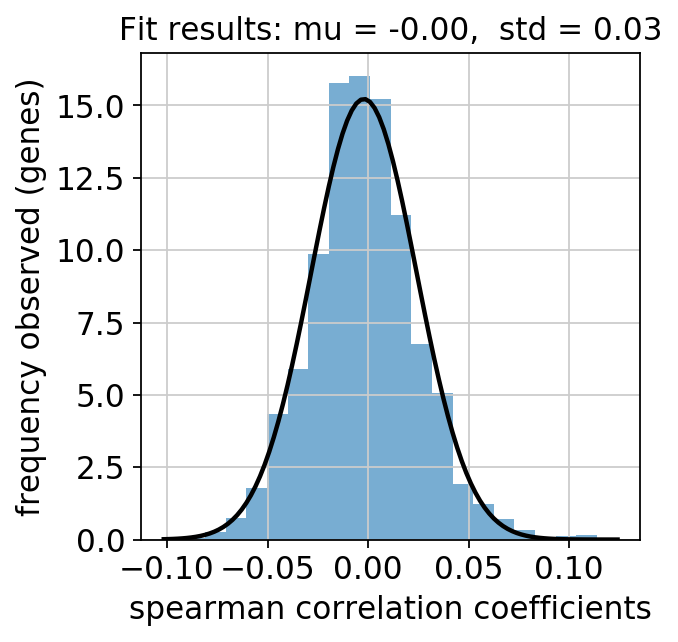

In [75]:
# PLOT the histogram of spearman r values
import matplotlib.pyplot as plt
from scipy.stats import norm

def plt_hist_thresh(in_df, thresh):
    
    sub_df = in_df[in_df["pairs_count"] >= thresh]
    data = sub_df["spearman_r"]
    mu, std = norm.fit(data)
    plt.hist(data, bins = 20, density = True, stacked = True, alpha = 0.6)
    #plt.yscale("log")
    plt.ylabel("frequency observed (genes)")
    plt.xlabel("spearman correlation coefficients")
    
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.savefig("/labs/congle/PRT/dzy_mem_seq/fig6_plts/pairwise_spearman_r_dist_thresh_" + str(thresh) + ".pdf", bbox_inches = "tight")
    plt.show()
    
    # Fit a normal distribution to the data:


    #plt.hist(df_final["spearman_r"], bins = 20)
    #plt.yscale("log")
    #plt.ylabel("frequency observed (genes)")
    #plt.xlabel("spearman correlation coefficients")
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/fig6_plts/pairwise_spearman_r_dist.pdf", bbox_inches = "tight")
    
no_thresh = plt_hist_thresh(df_final, 10000)

In [11]:
# drop genes that are observed in less than n cells

def cell_exp_filter(input_df, thresh):
    
    filter_df = input_df.loc[input_df["num_cells_expressing"].gt(thresh)]
    #print(filter_df)
    
    return filter_df

filter_exp_1_16 = cell_exp_filter(df_1, 16)
#filter_lg_0 = cell_exp_filter(df_1, 0)
#filter_lg_2 = cell_exp_filter(df_1, 2)
#filter_lg_3 = cell_exp_filter(df_1, 3)
#print(len(filter_lg_3))
#filter_lg_6 = cell_exp_filter(df_1, 6)
#print(len(filter_lg_6))
#filter_lg_9 = cell_exp_filter(df_1, 9)
#print(len(filter_lg_9))
#filter_lg_16_1 = cell_exp_filter(sub1_df_final, 16)
#filter_lg_16_2 = cell_exp_filter(sub2_df_final, 16)
#print(len(filter_lg_16_1))
#print(len(filter_lg_16_2))


#filter_lg_1.to_csv("/labs/congle/PRT/dzy_mem_seq/outs/filtered_dfs/20201105_merged_df_lg1.csv")

In [ ]:
list(filter_lg_0)

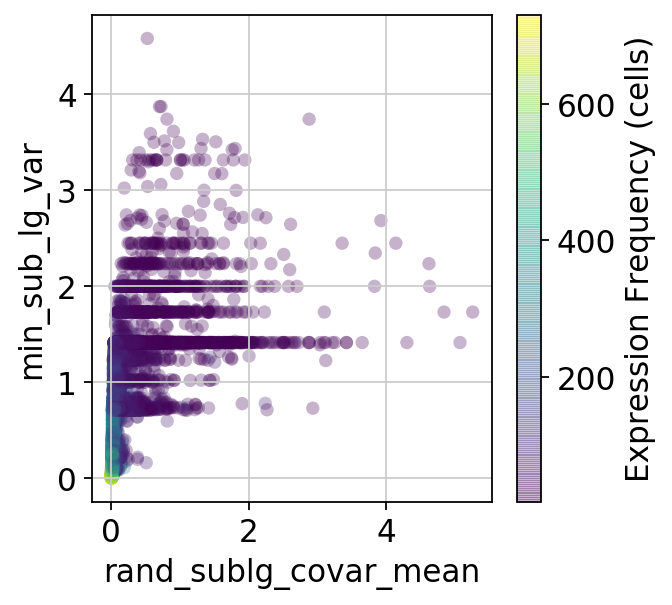

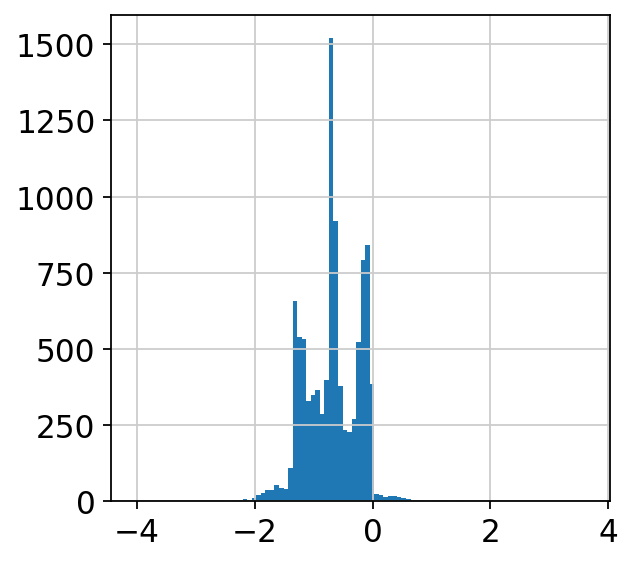

In [12]:
##### import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats
import csv

def comb_df_viz(input_df, xlab, ylab, pseudocount):
    
    #print(input_df)
    x = input_df[xlab]
    y = input_df[ylab]
    
    #plt.hist(x, bins = "auto")
    #plt.xlabel(xlab)
    #plt.show()
    #plt.hist(y, bins = "auto")
    #plt.xlabel(ylab)
    #plt.show()

    plt.scatter(x, y, c = input_df["num_cells_expressing"], edgecolor='', alpha = 0.3)
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    #plt.xlim(0, 3)
    #plt.ylim(0, 5)
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/" + xlab + "_vs_" + ylab + "_20201105_color_cell_exp.pdf", bbox_inches = "tight")
    plt.colorbar(label = "Expression Frequency (cells)")
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/mol_cell_review/plts/20220322_lg109_cv_vs_null_thresh16.pdf", bbox_inches = "tight")
    plt.show()
    
    x_drop = x.dropna()
    y_drop = y.dropna()
    
    x_index = x_drop.index
    y_index = y_drop.index
    
    intrsct = list(set(x_index).intersection(y_index))
    #print(len(intrsct))
    
    model_df = pd.DataFrame(index = intrsct)
    
    x_sub = x_drop[intrsct]
    y_sub = y_drop[intrsct]
    
    diff = x-y # random - observed (if exp is more uniform then, random > observed and diff > 0)
    plt.hist(diff, bins = 100)
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/mol_cell_review/plts/20220322_lg109_mem_index_dist_thresh16.pdf", bbox_inches = "tight")
    plt.show()
    #plt.yscale("log")
    
    input_df["diff"] = diff
    
    #plt.scatter(input_df["diff"], input_df["spearman_r"], c = input_df["num_cells_expressing"], alpha = 0.03)
    #plt.colorbar(label = "Expression Frequency (cells)")
    #plt.xlabel("memory index")
    #plt.ylabel("scc")
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/fig6_plts/mem_index_vs_scc_pairwise_16cell_cutoff.pdf", bbox_inche = "tight")
    #plt.show()
    
    #plt.scatter(input_df["avg"], input_df["all_cells_gini"], edgecolor='', c = input_df["diff"], alpha = 0.03)
    #plt.colorbar(label = "Memory Index")
    
    #mem_gene_df = input_df[['diff', 'avg', 'all_cells_gini']]
    #mem_thresh_pct = np.percentile(input_df['diff'].dropna(), 95)
    #mem_thresh = 1
    #print(mem_thresh_pct)
    
    #mem_gene_df_filter_1 = mem_gene_df[mem_gene_df['diff'] >= mem_thresh_pct]
    #mem_genes = list(mem_gene_df_filter_1.index)
    
    
    #with open("/labs/congle/PRT/dzy_mem_seq/csv/mem_genes/mem_genes_20210126_16cell_cutoff_95pct.csv", "w") as out_file:
        
    #    for item in mem_genes:
            
    #        out_file.write("%s\n" % item)
    
    #plt.scatter(mem_gene_df_filter_1["avg"], mem_gene_df_filter_1["all_cells_gini"], s=1, edgecolor='purple')
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/fig6_plts/GINI_vs_exp_level_scatter_16_panelD.pdf", bbox_inches = "tight")
    #plt.show()                
    
    #plt.scatter(input_df['all_cells_gini'], input_df['diff'], alpha = 0.03, c = input_df["num_cells_expressing"])
    #plt.colorbar(label = "Expression Frequency (cells)")
    #plt.savefig("/labs/congle/PRT/dzy_mem_seq/fig6_plts/GINI_vs_mem_index_16_panelE.pdf", bbox_inches = "tight")
    #plt.xscale('log')
    #plt.xlim(0, 1e3)
    #plt.show()
    #for gene, row in input_df.iterrows():
        
    #    if row["diff"] <= -7:
            
    #        print(gene)
    #        print(row["diff"])
    #        print(row["num_cells_expressing"])
            #print(row["all_cells_gini"])
    
    #m, b = np.polyfit(x_sub, y_sub, 1)
    #print(m, b)
    
    #y_pred = m*y + b
    #print(y_pred)
    
    #resid = y_pred - y_sub
    #print(max(resid))
    
    #plt.hist(resid, bins = "auto")
    
    #model_df["random_sublg_cv"] = x_sub
    #model_df["random_sublg_cv"] = y_sub
    #model_df["predicted_cv"] = y_pred
    #model_df["resid"] = y_pred - y_sub # positive residuals are interesting genes
    #print(model_df)
    
    return input_df
    
    #return mem_genes
    
#viz_1 = comb_df_viz(panel_20201104.dropna(how = "all"), "min_sub_lg_var", "all_cells_gini", 0.002)
#viz_2 = comb_df_viz(panel_20201104_random.dropna(how = "all"), "rand_exp_mean", "rand_all_cells_gini_mean", 0.002)
#viz_3 = comb_df_viz(filter_lg_1.dropna(how = "all"), "rand_all_cells_gini_mean", "all_cells_gini", 0.002)
#viz_4 = comb_df_viz(filter_lg_16.dropna(how = "all"), "rand_sublg_covar_mean", "min_sub_lg_var", 0.002)
#viz_5 = comb_df_viz(filter_lg_32.dropna(how = "all"), "rand_sublg_covar_mean", "min_sub_lg_var", 0.002)

#viz_6 = comb_df_viz(filter_lg_3.dropna(how = "all"), "avg", "coeff_var", 0.002)
#viz_6 = comb_df_viz(filter_lg_6.dropna(how = "all"), "avg", "coeff_var", 0.002)
#viz_6 = comb_df_viz(filter_lg_9.dropna(how = "all"), "avg", "coeff_var", 0.002)
viz_6_1 = comb_df_viz(filter_exp_1_16.dropna(how = "all"), "rand_sublg_covar_mean", "min_sub_lg_var", 0.002)
#viz_6_2 = comb_df_viz(filter_lg_16_2.dropna(how = "all"), "rand_sublg_covar_mean", "min_sub_lg_var", 0.002)



In [13]:
print(viz_6_1["diff"])

viz_6_1["diff"].to_csv("/labs/congle/PRT/dzy_mem_seq/outs/2022Apr08_exp_1_mem_index_new_standard.csv")




genes
A1BG                       -0.147231
A1BG-AS1                   -0.953244
A4GALT                      0.118370
AAAS                       -0.669743
AACS                       -0.731751
                              ...   
ZXDC                       -1.331650
ZYG11B                     -0.682502
ZYX                        -0.085348
ZZEF1                      -1.249812
barcode_transcript_v1new   -0.237444
Name: diff, Length: 10177, dtype: float64


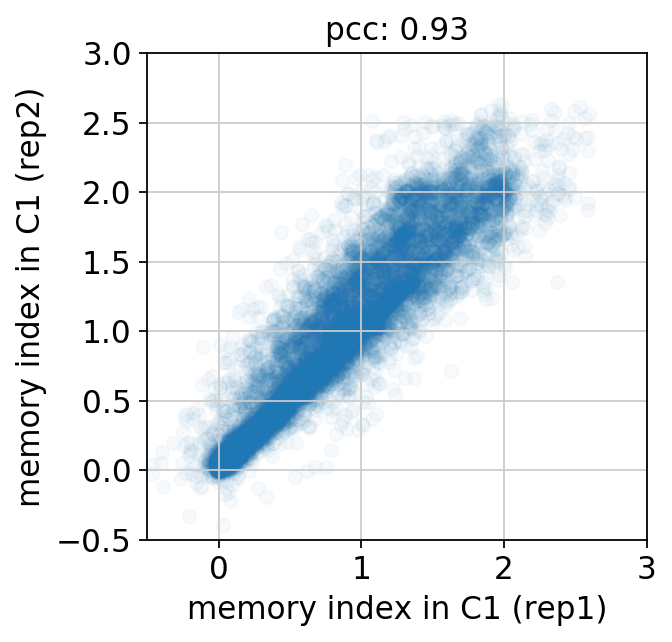

In [15]:
# now examine the correlation in mem-index values across experiments

from scipy import stats

def cross_batch_mem(df_1, df_2):
    
    new_index = list(set(df_2.index).intersection(set(df_1.index)))
    #print(len(new_index))
    combo_df = pd.DataFrame(index = new_index)
    #print(len(combo_df))
    
    mem_1 = df_1["diff"]
    mem_2 = df_2["diff"]
    
    for gene, val in mem_1.iteritems():
        
        combo_df.loc[gene, "mem_1"] = val
        
    for gene, val in mem_2.iteritems():
        
        combo_df.loc[gene, "mem_2"] = val
        
    #print(combo_df)
    
    plt.scatter(combo_df["mem_1"], combo_df["mem_2"], alpha = 0.03)
    plt.xlim(-0.5, 3)
    plt.ylim(-0.5, 3)
    
    combo_df_drop = combo_df.dropna()
    
    prson = stats.pearsonr(combo_df_drop["mem_1"], combo_df_drop["mem_2"])[0]
    sprmn = stats.spearmanr(combo_df_drop["mem_1"], combo_df_drop["mem_2"])[0]

    plt.title("pcc: " + str(round(prson, 2)))
    plt.xlabel("memory index in C1 (rep1)")
    plt.ylabel("memory index in C1 (rep2)")
    
    plt.savefig("/labs/congle/PRT/dzy_mem_seq/mol_cell_review/plts/2022March22_cross_rep_mem_index_corr.pdf", bbox_inches = "tight")
    
cross_1 = cross_batch_mem(viz_6_1, viz_6_2)

In [10]:
for gene in viz_4:
    
    if gene not in viz_5: # what do uou lose?
    
        print(gene)

8-Mar
AARS2
ABCA2
ABCC10
ABHD15
ABHD18
AC002401.4
AC005332.7
AC005523.1
AC005838.2
AC006058.3
AC006449.6
AC007040.2
AC007114.2
AC007240.1
AC008610.1
AC008741.2
AC008946.1
AC008966.1
AC009113.1
AC009118.2
AC009118.3
AC009133.1
AC009275.1
AC009948.1
AC010327.3
AC010894.3
AC011447.3
AC012306.2
AC013394.1
AC015813.1
AC015982.1
AC016394.1
AC016831.1
AC017033.1
AC018645.2
AC019069.1
AC023509.4
AC024060.1
AC025181.2
AC025470.2
AC026304.1
AC026979.2
AC037459.3
AC064807.1
AC068338.2
AC068491.3
AC073335.2
AC079922.2
AC090409.1
AC091153.3
AC093462.1
AC097376.2
AC099522.2
AC107959.4
AC116913.1
AC124283.1
AC139530.1
AC142472.1
AC146944.4
AC242426.2
AC245452.1
ACAP1
ACBD4
ACCS
ACSS3
ACVR1B
ADAMTS7
ADAMTSL4
ADAT2
ADCK1
ADGRA2
ADGRB2
ADGRL3
ADGRV1
ADM5
ADRB2
AF117829.1
AF121898.1
AF279873.3
AGAP4
AGAP6
AGO4
AJM1
AJUBA
AL031777.3
AL031847.1
AL035071.1
AL049629.1
AL109811.2
AL117332.1
AL121772.1
AL121820.2
AL133215.2
AL133245.1
AL133342.1
AL138724.1
AL138885.3
AL139089.1
AL161421.1
AL356488.3
AL358334.2

In [ ]:
#print(viz_4)

# add rankings to the df

viz_4['default_rank'] = viz_4['diff'].rank()
viz_4['pct_rank'] = viz_4['diff'].rank(pct=True)

print(viz_4)


In [ ]:
# print out viz_4 s.t. you can do gseapy for functional annotations of top ranked genes

viz_4.to_csv("/home/nwhughes/mem_seq_home/files/20201108_rank_df.csv")

In [ ]:
##### import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from scipy import stats

def comb_df_viz(input_df, xlab, ylab, pseudocount):
    
    #print(input_df)
    x = input_df[xlab]
    y = input_df[ylab]
    #print(x)
    #print(y)
    #x_log = np.log10(1 / (x + pseudocount))
    #print(x_log)
    
    # Calculate the point density
    #xy = np.vstack([x, y])
    #z = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots()
    #ax.scatter(x, y, c = input_mat["num_cells_expressing"], s=10, edgecolor='')
    ax.scatter(x, y, c = input_df["num_cells_expressing"], s=10, edgecolor='')
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    #plt.xlim(0, 3)
    #plt.ylim(0, 5)
    plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/" + xlab + "_vs_" + ylab + "_20201118_color_cell_exp.pdf", bbox_inches = "tight")
    plt.show()
       
#viz_5 = comb_df_viz(df_1.dropna(how = "all"), "pct_rank", "time_pearson_r", 0.002)
#viz_5 = comb_df_viz(df_1.dropna(how = "all"), "pct_rank", "time_spearman_r", 0.002)

viz_5 = comb_df_viz(static_df.dropna(how = "all"), "max_avg", "time_spearman_r", 0.002)


In [ ]:
# plot individual violinplot of mean random uniformity vs. observed uniformity

import seaborn as sns
import matplotlib.pyplot as plt

def plt_violin_single(input_df, rand, obs):
    
    ax_random = sns.violinplot(x = input_df[rand])
    plt.xlim(0, 0.6)
    plt.show()
    ax_obs = sns.violinplot(x = input_df[obs])
    plt.xlim(0, 0.6)
    plt.show()

    
lg_1_plt_1 = plt_violin_single(df_1, "rand_min_sublg_gini_mean", "min_intra_gini")

    
    
    

In [ ]:
import matplotlib.pyplot as plt

def comb_df_viz(input_df):
    
    i = 0

    for gene, row in input_df.iterrows():
    
        rand_disp_max = float(row["rand_all_cells_gini_max"])
        rand_disp_mean = float(row["rand_all_cells_gini_mean"])
        rand_uniform_min= float(row["rand_min_sublg_gini_min"])
        rand_uniform_men= float(row["rand_min_sublg_gini_mean"])
        rand_uniform_stdev= float(row["rand_min_sublg_gini_stdev"])
        obs_disp = float(row["all_cells_gini"])
        #print(obs_disp)
        obs_uniform = float(row["min_intra_gini"])
        obs_cells = float(row["num_cells_expressing"])
        input_df.loc[gene, "uniformity_diff"] = abs(obs_uniform - rand_uniform_men)
        input_df.loc[gene, "dispersion_diff"] = abs(obs_disp - rand_disp_mean)
        
        if rand_uniform_stdev:
            
            uniform_rank = (obs_uniform - rand_uniform_men) / rand_uniform_stdev
            
        input_df.loc[gene, "uniformity_rank"] = uniform_rank
    
        if uniform_rank >= 3 and obs_disp > 0.25:
            
            #print(gene)
            i += 1
            #print(obs_cells)
            
    plt.scatter(input_df["rand_min_sublg_gini_mean"], input_df["min_intra_gini"])
        
    print(i)
    
viz_1 = comb_df_viz(df_1)    
        
        
        

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def comb_df_viz(input_df, xlab, ylab):
    
    hi = np.log2(1 / input_df["min_intra_gini"]) # heritability index = 1 / gini (log2 transform)
    #print(heritability_index)
    input_df["hi"] = hi
    rand_hi = np.log2(1 / input_df["rand_min_sublg_gini_mean"])
    input_df["rand_hi"] = rand_hi
    
    ranked = rand_hi.sort_values(ascending = False)
    print(ranked)
    
    # Calculate the point density
    xy = np.vstack([hi, rand_hi])
    z = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots()
    #ax.scatter(x, y, c = input_mat["num_cells_expressing"], s=10, edgecolor='')
    ax.scatter(rand_hi, hi, c = z, s=10, edgecolor='')
    plt.ylabel(ylab)
    plt.xlabel(xlab)
    plt.xlim(0, 14)
    plt.ylim(0, 14)
    
    m, b = np.polyfit(rand_hi, hi, 1)
    print(m, b)
    #plt.plot(rand_hi, m*rand_hi + b, c = "black")
    
    plt.show()
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/20201031_lg1_" +  xlab + "_vs_" + ylab +".pdf", bbox_inches 
    #           = "tight")
    # now calculate the predicted HI given the regression and plot the difference (residual) vs. dispersion
    # to nominate transcriptional memory genes
    
    hi_predicted = m * rand_hi + b
    input_df["hi_predicted"] = hi_predicted
    input_df["hi_residual"] = hi - hi_predicted
    
    plt.hist(input_df["hi_residual"], bins = "auto")
    plt.xlabel("heritability index residual")
    plt.ylabel("frequency observed (genes)")
    plt.yscale("log")
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/20201031_lg1_HI_dist.pdf", bbox_inches 
    #           = "tight")
    plt.show()
    
    x2y2 = np.vstack([input_df["all_cells_gini"], input_df["hi_residual"]])
    z2 = gaussian_kde(x2y2)(x2y2)
    fig2, ax2 = plt.subplots()
    ax2.scatter(input_df["hi_predicted"], input_df["hi_residual"], c = z2, s=10, edgecolor='')
    plt.xlabel("Predicted Heritability Index")
    plt.ylabel("Heritability Index Residual")
    plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/20201031_lg1_predicted_HI_vs_HI_residual.pdf", bbox_inches 
               = "tight")
    plt.show()
    
    sub_df = input_df[["hi_residual", "all_cells_gini"]]
    print(sub_df)
    
    sub_df.to_csv("/home/nwhughes/mem_seq_home/files/20201031_resid_vs_dispersion.csv")
    
    plt.scatter(input_df["depmap_score"], input_df["hi_residual"])
    plt.show()
    plt.scatter(input_df["depmap_score"], input_df["all_cells_gini"])
    plt.show()
    plt.scatter(input_df["depmap_score"], input_df["num_cells_expressing"])
    plt.show()
    #regplot = sns.regplot(x="hi", y="rand_hi", data=input_df, x_estimator=np.mean)
    
    return input_df
    
viz_1 = comb_df_viz(filter_lg_1.dropna(), "Mean Random Heritability Index", "Observed Heritability Index")    

In [ ]:
# plot ranked residual plot

i = 0

rank_sries = pd.Series(index = range(1, 20000))

for gene, row in viz_4.iterrows():
    
    rank_sries.loc[i] = row["diff"]
        
    i += 1
        
rank_drop = rank_sries.dropna().sort_values(ascending = False)
   
print(rank_drop.index)

plt_dict = {}

j = 0

for gene, val in rank_drop.iteritems():
    
    plt_dict[j] = val
    
    j += 1
    



    
    
    


In [ ]:

plt.scatter(plt_dict.keys(), plt_dict.values(), s = 10)

plt.savefig("/home/nwhughes/mem_seq_home/plts/cdfs/20201105_cdf_diff_rank.pdf", bbox_inches = "tight")

In [ ]:
### def comb_df_viz(input_df):
    
    i = 0

    for gene, row in input_df.iterrows():
    
        rand_disp_max = float(row["rand_all_cells_gini_max"])
        rand_disp_mean = float(row["rand_all_cells_gini_mean"])
        rand_uniform_min= float(row["rand_min_sublg_gini_min"])
        rand_uniform_men= float(row["rand_min_sublg_gini_mean"])
        rand_uniform_stdev= float(row["rand_min_sublg_gini_stdev"])
        obs_disp = float(row["all_cells_gini"])
        #print(obs_disp)
        obs_uniform = float(row["min_intra_gini"])
        obs_cells = float(row["num_cells_expressing"])
        input_df.loc[gene, "uniformity_diff"] = abs(obs_uniform - rand_uniform_men)
        input_df.loc[gene, "dispersion_diff"] = abs(obs_disp - rand_disp_mean)
        
        if rand_uniform_stdev:
            
            uniform_rank = (obs_uniform - rand_uniform_men) / rand_uniform_stdev
            
        input_df.loc[gene, "uniformity_rank"] = uniform_rank
    
        if uniform_rank >= 3 and obs_disp > 0.25:
            
            #print(gene)
            i += 1
            #print(obs_cells)
            
    plt.scatter(input_df["rand_min_sublg_gini_mean"], input_df["min_intra_gini"])
        
    print(i)
    
viz_1 = comb_df_viz(df_1)    

In [ ]:
# combine the two dfs based on the metrics of interest

index_combo = set(list(mcpf1_1027_lg1.index) + list(mcpf1_1027_lg2.index))
combo_df = pd.DataFrame(index = index_combo)
#print(combo_df)

for index, row in mcpf1_1027_lg1.iterrows():
    
    combo_df.loc[index, "min_intra_gini_lg1"] = row["min_intra_gini"]
    combo_df.loc[index, "all_cells_gini_lg1"] = row["all_cells_gini"]
    combo_df.loc[index, "num_cells_exp_lg1"] = row["num_cells_expressing"]
    
for index, row in mcpf1_1027_lg2.iterrows():
    
    combo_df.loc[index, "min_intra_gini_lg2"] = row["min_intra_gini"]
    combo_df.loc[index, "all_cells_gini_lg2"] = row["all_cells_gini"]
    combo_df.loc[index, "num_cells_exp_lg2"] = row["num_cells_expressing"]
    
print(combo_df)
    


In [ ]:
for gene, row in combo_df.iterrows():
    
    if row["inter_gini_lg2"] >= 0.3 and row["inter_gini_lg1"] <= 0.1:
        
        print(gene)
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

def plt_scatter(input_mat, in_x, in_y):
    
    plt.show()
    x = input_mat[in_x]
    y = input_mat[in_y]
    
    # Calculate the point density
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    
    fig, ax = plt.subplots()
    #ax.scatter(x, y, c = input_mat["num_cells_expressing"], s=10, edgecolor='')
    ax.scatter(x, y, c = z, s=10, edgecolor='')
    plt.ylabel(in_y)
    plt.xlabel(in_x)
    #plt.xlim([0, 700])
    #plt.ylim([0, 700])
    #plt.savefig("/home/nwhughes/mem_seq_home/plts/scatter/20201030_lg1_color_cell_exp_" + in_x + "_vs_" + in_y +".pdf", bbox_inches = "tight")
    #plt.show()
    
#plt_1 = plt_scatter(mcpf1_1027_lg1 , "min_intra_gini", "all_cells_gini")
#plt_2 = plt_scatter(mcpf1_1027_lg2 , "max_avg", "coeff_var")
#plt_2 = plt_scatter(mcpf1_1027_lg2 , "inter_gini", "coeff_var")
#plt_3 = plt_scatter(mcpf1_1027_lg2 , "max_avg", "entropy")

#plt_4 = plt_scatter(combo_df.dropna(), "all_cells_gini_lg1", "all_cells_gini_lg2")
#plt_4 = plt_scatter(combo_df.dropna(), "num_cells_exp_lg1", "num_cells_exp_lg2")
#plt_4 = plt_scatter(combo_df.dropna(), "inter_gini_lg1", "inter_gini_lg2")
    
#plt_5 = plt_scatter(mcpf1_1027_lg2.dropna(), "all_cells_gini", "depmap_score")

#plt_6 = plt_scatter(mcpf1_1027_lg2.dropna(), "min_intra_gini", "inter_gini")
#plt_6 = plt_scatter(mcpf1_1027_lg1.dropna(), "min_intra_gini", "inter_gini")

plt_7 = plt_scatter(df_1.dropna(), "min_intra_gini", "rand_min_sublg_gini_0.5")
#plt_7 = plt_scatter(df_1.dropna(), , "rand_all_cells_gini_mean")

#plt_8 = plt_scatter(df_1.dropna(), "num_cells_expressing", "rand_num_cells_mean")

#plt_9 = plt_scatter(mcpf1_1027_lg1, , "all_cells_gini")

#plt_10 = plt_scatter(df_1.dropna(), "uniformity_diff", "dispersion_diff")






In [ ]:
plt.scatter(df_1["min_intra_gini"], df_1["all_cells_gini"])
plt.scatter(df_1["rand_min_sublg_gini_mean"], df_1["rand_all_cells_gini_mean"])

In [ ]:
# automate seaborn violin viz
# if you want to plot depmap score maybe first convert to quantile

import seaborn as sns

from matplotlib import pyplot as plt

def vln_plot(input_df, title):

    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    
    ax = sns.violinplot(x = "ranking_bin", y = "time_spearman_r", data = input_df, width = 0.75)
    plt.xlabel("Memory Index")
    plt.ylabel("Correlation in Expression within Clone Across Time")
    #plt.ylim(0.05, 0.5)
    plt.title(title)
    plt.savefig("/home/nwhughes/mem_seq_home/plts/violin/" + title + ".pdf", bbox_inches = "tight")
    plt.show()
    
vln_1 = vln_plot(df_1.dropna(how = "all"), "_heritability_vs_time_spearman")

    

In [ ]:
# now it would be nice to plot ordered bar chart for all samples

# now visualize the distribution of indel outcomes across timepoints
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.patches as patches

def plot_dist(input_df, rank):
        
    input_sries = input_df["ggini"]
    plt.hist(input_sries, bins = 100)
    plt.show()
    SOI = input_sries.dropna()
    ranked = SOI.sort_values(ascending = False)
    top_20 = ranked.iloc[0:rank]
    
    ax = top_20.plot.bar(title = "top " + str(rank) + "_ggini", fontsize = 7, figsize = (10, 10))
    plt.savefig("/home/nwhughes/mem_seq_home/plts/bar_chart/20201026_mcpf1.pdf", bbox_inches = "tight")
    plt.show()
    
    
plot_c9_all = plot_dist(mcpf1_1026, 100)

In [ ]:
# perhaps genes that show variable expression and possible memory are more dispensable and under less regulation to 
# constitutively expressed -- load in depmap data to examine

def load_dep_map(in_fn):
    
    depmap = pd.read_csv(in_fn, index_col = 0)
    #print(depmap)
    
    clean_sries = pd.Series()
    
    for index, row in depmap.iterrows():
        
        index_split = index.split(" ")
        #print(index_split)
        gene_cln = index_split[0]
        clean_sries[gene_cln] = float(row["Depmap Score"])
    
    #print(clean_sries)
    
    return clean_sries

read_dep_map = load_dep_map("/oak/stanford/scg/lab_congle/PRT/dzy_mem_seq/csv/depmap_triage_a375.csv")    
    

In [ ]:
# add the depmap scores to the existing dfs

for index, score in read_dep_map.iteritems():
    
    if index in viz_4.index:
        
        viz_4.loc[index, "depmap_score"] = score
    
    #if index in mcpf1_1027_lg2.index:
        
    #    mcpf1_1027_lg2.loc[index, "depmap_score"] = score
    

In [ ]:
#mcpf1_1027_lg1["inter_gini_bin"] = pd.qcut(mcpf1_1027_lg1['inter_gini'], q=[0, 0.25, 0.5, 0.75, 1])
#mcpf1_1027_lg1["max_avg_bin"] = pd.qcut(mcpf1_1027_lg1['max_avg'], q=[0, 0.25, 0.5, 0.75, 1])
#mcpf1_1027_lg1["ggini_bin"] = pd.qcut(mcpf1_1027_lg1['ggini'], q=[0, 0.25, 0.5, 0.75, 1])
#mcpf1_1027_lg1["coeff_var_bin"] = pd.qcut(mcpf1_1027_lg1['coeff_var'], q=[0, 0.25, 0.5, 0.75, 1])

depmap_bins = [-3, 0, 1, 2, 3]
viz_4["ranking_bin"] = pd.cut(viz_4['diff'], bins = depmap_bins)

In [ ]:
print(mcpf1_1027_lg1)